- Nhóm 10
- Học viên:
    - Phạm Thị Hoà - 23C23007
    - Trịnh Quang Trí - 23C23010

# MÔ HÌNH ANOVA HAI NHÂN TỐ

### BỘ DỮ LIỆU: Heart Failure Clinical Records
Thông tin về bộ dữ liệu "Heart Failure Clinical Records":
- Nguồn: UCI Machine Learning Repository
- Link: [Heart Failure Clinical Records](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)
- Số lượng mẫu: 299
- Số lượng biến số: 13 đặc điểm lâm sàng và 1 biến mục tiêu (sự kiện tử vong)
- Mô tả: Bộ dữ liệu bao gồm các đặc điểm lâm sàng như tuổi, bệnh thiếu máu, lượng creatinine phosphokinase, bệnh tiểu đường, phần trăm máu rời khỏi tim mỗi lần co bóp, huyết áp cao, tiểu cầu trong máu, mức độ creatinine trong huyết thanh, mức độ natri trong huyết thanh, giới tính, tình trạng hút thuốc, và thời gian theo dõi.

- Thông tin của các cột trong bộ dữ liệu:
    - age: Tuổi của bệnh nhân (đơn vị: năm).
    - anaemia: Tình trạng thiếu máu (1: có thiếu máu, 0: không có thiếu máu).
    - creatinine_phosphokinase (cpk): Lượng creatinine phosphokinase trong máu (đơn vị: mcg/L).
    - diabetes: Tình trạng tiểu đường (1: có tiểu đường, 0: không có tiểu đường).
    - ejection_fraction: Phần trăm máu rời khỏi tim mỗi lần co bóp (đơn vị: %).
    - high_blood_pressure: Tình trạng huyết áp cao (1: có huyết áp cao, 0: không có huyết áp cao).
    - platelets: Số lượng tiểu cầu trong máu (đơn vị: kiloplatelets/mL).
    - serum_creatinine: Mức độ creatinine trong huyết thanh (đơn vị: mg/dL).
    - serum_sodium: Mức độ natri trong huyết thanh (đơn vị: mEq/L).
    - sex: Giới tính của bệnh nhân (1: nam, 0: nữ).
    - smoking: Tình trạng hút thuốc (1: có hút thuốc, 0: không hút thuốc).
    - time: Thời gian theo dõi (đơn vị: ngày).
    - DEATH_EVENT: Sự kiện tử vong (1: bệnh nhân đã tử vong, 0: bệnh nhân còn sống).

In [1]:
# Các thư viện cần thiết
library(glue)
library(faraway)
library(MASS)
library(ggplot2)
library(car)
library(MASS)
library(lmtest)
library(caret)
library(magrittr)
options(warn = -1)
set.seed(42)

Loading required package: carData


Attaching package: 'car'


The following objects are masked from 'package:faraway':

    logit, vif


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:faraway':

    melanoma




In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
file_name = "heart_failure_clinical_records_dataset.csv"
file_path = paste(base_path, glue("../dataset/{file_name}"), sep = "/")

In [4]:
df <- read.csv(file_path,header = TRUE, sep = ",")
head(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


## NHẬN ĐỊNH BÀI TOÁN

In [5]:
print(glue("So dong cua du lieu: {nrow(df)}"))
print(glue("So cot cua du lieu: {ncol(df)}"))

So dong cua du lieu: 299
So cot cua du lieu: 13


In [6]:
print("Cau truc cua du lieu: ")
print(str(df))

[1] "Cau truc cua du lieu: "
'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...
NULL


- age: Tuổi của bệnh nhân (đơn vị: năm)
    - Kiểu dữ liệu: số (numeric)
    - Giá trị ví dụ: 75, 55, 65, 50, 65, 90
- anaemia: Tình trạng thiếu máu (1: có thiếu máu, 0: không có thiếu máu)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 0, 0, 0, 1, 1, 1
- creatinine_ph- osphokinase (cpk): Lượng creatinine phosphokinase trong máu (đơn vị: mcg/L)Kiểu dữ liệu: số (numeric)
    - Giá trị ví dụ- : 582, 7861, 146- , 111, 160, 47
- diabetes: Tình trạng tiểu đường (1: có tiểu đường, 0: không có tiểu đường
    - Kiểu dữ liệu: số nguyên (integer)- 
    - Giá trị ví dụ: 0, 0, 0, 0, 1, 0
- ejection_fraction: Phần trăm máu rời khỏi tim mỗi lần co bóp (đơn vị: %)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 20, 38, 20, 20, 20, 40
- high_blood_pressure: Tình trạng huyết áp cao (1: có huyết áp cao, 0: không có - huyết áp cao)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 1, 0, 0, 0, 0, 0
- platelets: Số lượng tiểu cầu trong máu (đơn vị: kiloplatelets/mL)
    - Kiểu dữ liệu: số (numeric)
    - Giá trị ví dụ: 265000, 263358, 162000, 210000, 327000
- serum_creatinine: Mức độ creatinine trong huyết thanh (đơn vị: mg/dL)
    - Kiểu dữ liệu: số (numeric)
    - Giá trị ví dụ: 1.9, 1.1, 1.3, 1.9, 2.7, 2.1
- serum_sodium: Mức độ natri trong huyết thanh (đơn vị: mEq/L)
    - Kiểu dữ liệu: số (numeric)
    - Giá trị ví dụ: 130, 136, 129, 137, 116, 132
- sex: Giới tính của bệnh nhân (1: nam, 0: nữ)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 1, 1, 1, 1, 0, 0
- smoking: Tình trạng hút thuốc (1: có hút thuốc, 0: không hút thuốc)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 0, 0, 1, 0, 0, 0
- time: Thời gian theo dõi (đơn vị: ngày)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 4, 6, 7, 8, 8, 10
- DEATH_EVENT: Sự kiện tử vong (1: bệnh nhân đã tử vong, 0: bệnh nhân còn sống)
    - Kiểu dữ liệu: số nguyên (integer)
    - Giá trị ví dụ: 1, 1, 1, 1, 1, 1

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
print("unique cua tung cot")
for (col in colnames(df)) {
        len_col <- length(unique(df[[col]]))
        print(glue("{col}: {len_col}"))
    }

[1] "unique cua tung cot"
age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


#### Phân loại Biến:
- Biến Định tính (Categorical Variables):
    - anaemia: Tình trạng thiếu máu (2 giá trị: 0 hoặc 1)
    - diabetes: Tình trạng tiểu đường (2 giá trị: 0 hoặc 1)
    - high_blood_pressure: Tình trạng huyết áp cao (2 giá trị: 0 hoặc 1)
    - sex: Giới tính (2 giá trị: 0 hoặc 1)
    - smoking: Tình trạng hút thuốc (2 giá trị: 0 hoặc 1)
    - DEATH_EVENT: Sự kiện tử vong (2 giá trị: 0 hoặc 1)
- Biến Định lượng (Continuous Variables):
    - age: Tuổi (47 giá trị duy nhất)
    - creatinine_phosphokinase: Lượng creatinine phosphokinase trong máu (208 giá trị duy nhất)
    - ejection_fraction: Phần trăm máu rời khỏi tim mỗi lần co bóp (17 giá trị duy nhất)
    - platelets: Số lượng tiểu cầu trong máu (176 giá trị duy nhất)
    - serum_creatinine: Mức độ creatinine trong huyết thanh (40 giá trị duy nhất)
    - serum_sodium: Mức độ natri trong huyết thanh (27 giá trị duy nhất)
    - time: Thời gian theo dõi (148 giá trị duy nhất)


## LỜI DẪN

- Trong bài toán này, chúng ta sẽ sử dụng phân tích ANOVA hai nhân tố để kiểm tra ảnh hưởng của tình trạng tiểu đường (diabetes) và tình trạng huyết áp cao (high blood pressure) đối với độ tuổi (age) của bệnh nhân bị suy tim.
Chọn biến độc lập:
- Bệnh tiểu đường (diabetes):
- Tình trạng huyết áp cao (high_blood_pressure)

Phân tích ANOVA hai nhân tố sẽ cho phép chúng ta kiểm tra:
- Ảnh hưởng riêng lẻ của tình trạng tiểu đường và tình trạng huyết áp cao đối với độ tuổi của bệnh nhân.
- Ảnh hưởng tương tác giữa tình trạng tiểu đường và tình trạng huyết áp cao đối với độ tuổi.

- X1: diabetes
- X2: high_blood_pressure
- Y: age

## TIỀN XỬ LÝ DỮ LIỆU

In [8]:
# Giữa lại các cột dữ liệu cần phân tích
df = df[, c("diabetes", "high_blood_pressure", "age")]
df[["diabetes"]] = as.factor(df[["diabetes"]])
df[["high_blood_pressure"]] = as.factor(df[["high_blood_pressure"]])
head(df)

,diabetes,high_blood_pressure,age
,<fct>,<fct>,<dbl>
1,0,1,75
2,0,0,55
3,0,0,65
4,0,0,50
5,1,0,65
6,0,1,90


In [9]:

check_missing_value_function <- function(df, list_col = c("")) {
    if (list_col[1] == "") {
        list_col <- names(df)
    }
    missing_df_all <- data.frame()
    for (col in list_col) {
        missing_rows <- which(is.na(df[[col]]))
        missing_df <- df[missing_rows, ]
        missing_df_all <- rbind(missing_df_all, missing_df)
    }
    missing_percent <- nrow(missing_df_all) / nrow(df) * 100
    print(glue("Du lieu co {nrow(missing_df_all)} dong bi thieu, chiem {missing_percent}%"))
    return(missing_df_all)
}

In [10]:
check_missing_value_function(df, colnames(df))

Du lieu co 0 dong bi thieu, chiem 0%


diabetes,high_blood_pressure,age
<fct>,<fct>,<dbl>


- Dữ liệu không có giá trị thiếu

In [11]:
summary(df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 

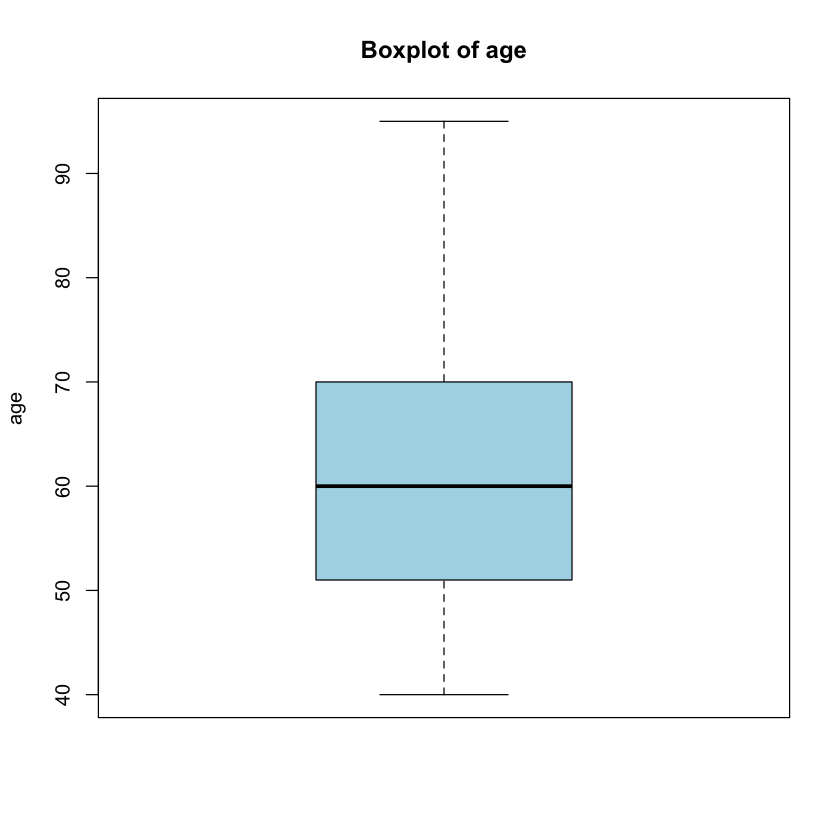

In [12]:
boxplot(df$age, main = "Boxplot of age", ylab = "age", col = "lightblue")

- Phạm vi: Độ tuổi của bệnh nhân nằm trong khoảng từ 40 đến 95 tuổi.
- Khoảng tứ phân vị (IQR): Từ 51 đến 70 tuổi.
- Trung vị (Median): 60 tuổi.
- Trung bình (Mean): 60.83 tuổi.
- Dữ liệu không tồn tại outlier

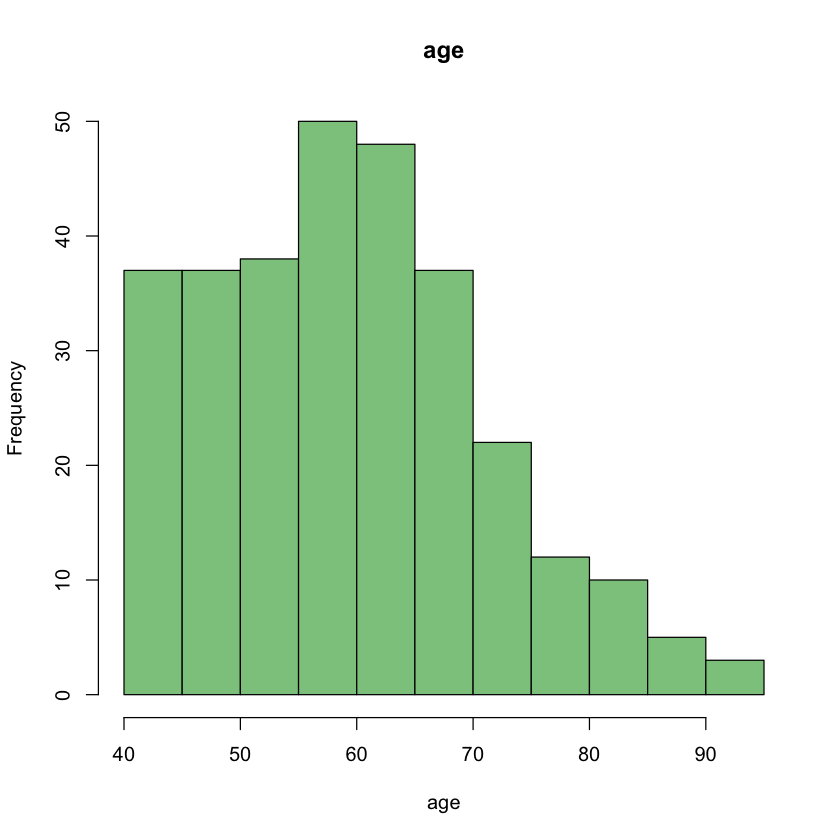

In [13]:
hist(df$age, breaks=10 ,main="age", xlab="age", col = "#8dc88d")


- Độ tuổi của bệnh nhân trong bộ dữ liệu trải dài từ 40 đến 95 tuổi. Tuy nhiên, phần lớn các bệnh nhân tập trung trong khoảng từ 50 đến 70 tuổi. Nhóm tuổi có tần suất xuất hiện cao nhất là từ 60 đến 65 tuổi, với số lượng bệnh nhân khoảng 50 người.
- Số lượng bệnh nhân giảm dần khi độ tuổi tăng lên từ 70 tuổi trở đi. Rất ít bệnh nhân có độ tuổi trên 80.

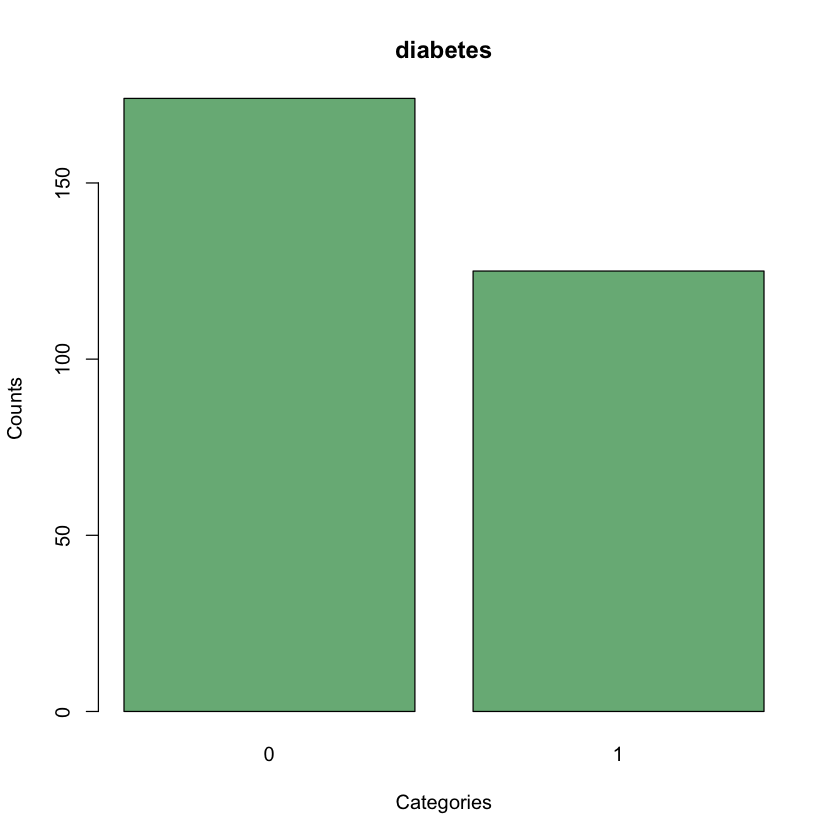

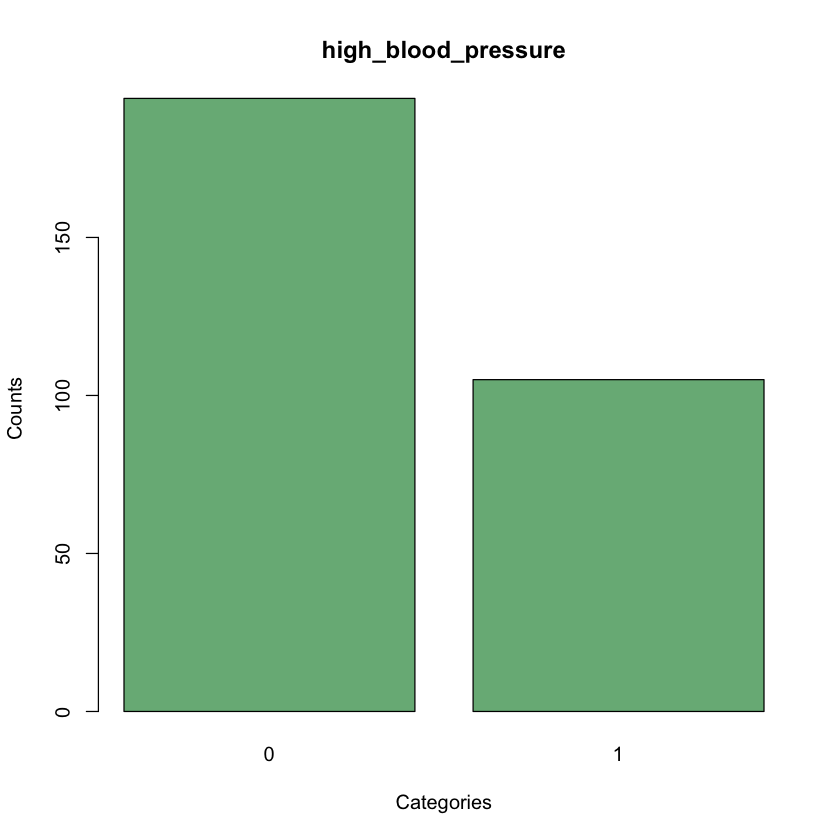

In [14]:
X = c("diabetes", "high_blood_pressure")
for (col in X){
    # Tạo bảng tần suất
    counts <- table(df[[col]])
    barplot(counts, main = col, xlab = "Categories", ylab = "Counts", col = "#78b586")
}

- Số lượng bệnh nhân không bị tiểu đường (0) là cao hơn đáng kể so với số lượng bệnh nhân bị tiểu đường (1).
- Cụ thể, số lượng bệnh nhân không bị tiểu đường là khoảng 160, trong khi số lượng bệnh nhân bị tiểu đường là khoảng 140.
- Số lượng bệnh nhân không bị huyết áp cao (0) cũng cao hơn đáng kể so với số lượng bệnh nhân bị huyết áp cao (1).
- Cụ thể, số lượng bệnh nhân không bị huyết áp cao là khoảng 195, trong khi số lượng bệnh nhân bị huyết áp cao là khoảng 104.


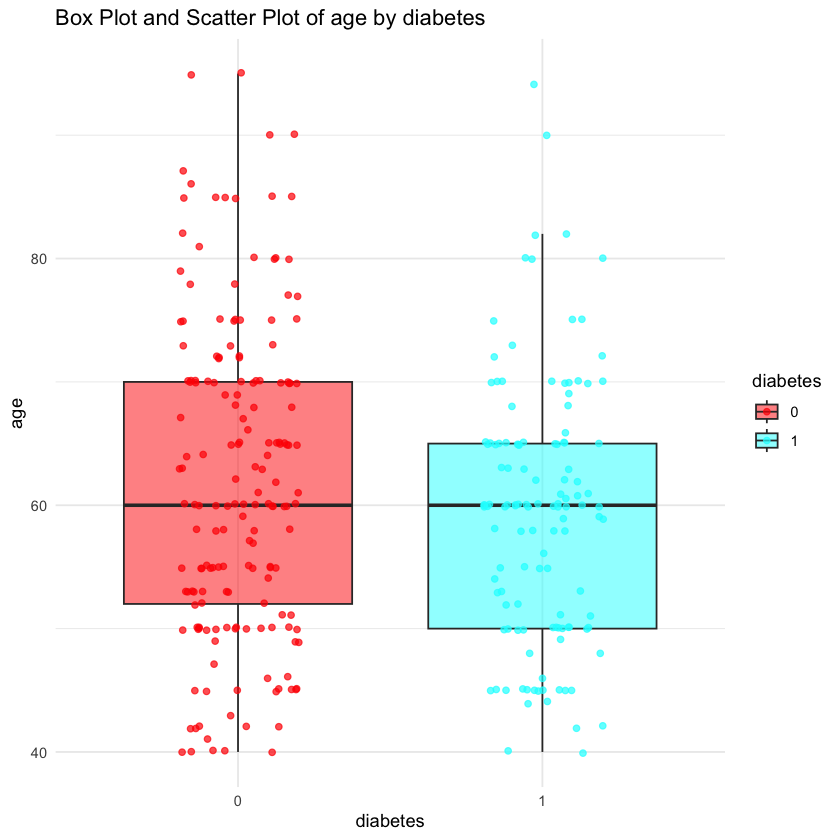

In [15]:
ggplot(df, aes(x = diabetes, y = age)) +
  geom_boxplot(aes(fill = diabetes), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = diabetes), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of age by diabetes", x = "diabetes", y = "age") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df$diabetes)))) +  
  scale_color_manual(values = rainbow(length(unique(df$diabetes))))  

- Phân bố tuổi của bệnh nhân tiểu đường và không tiểu đường: Biểu đồ cho thấy rằng tuổi của bệnh nhân không bị ảnh hưởng đáng kể bởi tình trạng tiểu đường. Cả hai nhóm có phân bố tuổi tương tự nhau với trung vị và phạm vi gần như giống nhau.
- Ảnh hưởng của tiểu đường đến độ tuổi: Không có sự khác biệt rõ ràng về độ tuổi giữa bệnh nhân bị tiểu đường và không bị tiểu đường. Điều này có thể cho thấy rằng tiểu đường không phải là yếu tố quan trọng ảnh hưởng đến độ tuổi của bệnh nhân trong bộ dữ liệu này.

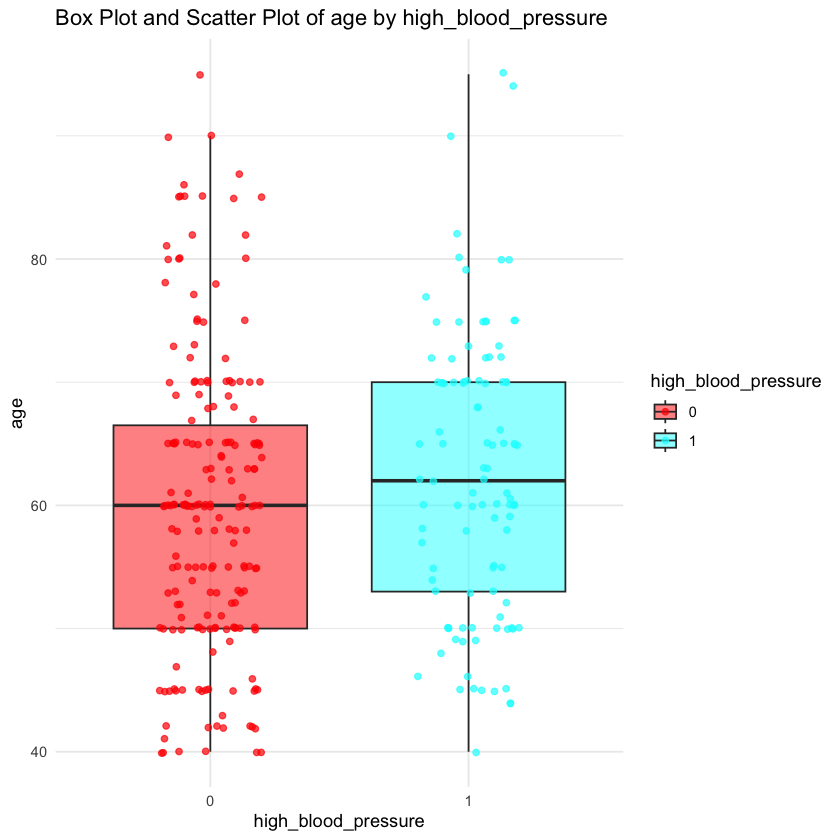

In [16]:
ggplot(df, aes(x = high_blood_pressure, y = age)) +
  geom_boxplot(aes(fill = high_blood_pressure), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = high_blood_pressure), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of age by high_blood_pressure", x = "high_blood_pressure", y = "age") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df$high_blood_pressure)))) +  
  scale_color_manual(values = rainbow(length(unique(df$high_blood_pressure))))  

- Phân bố tuổi của bệnh nhân có và không có huyết áp cao: Biểu đồ cho thấy rằng tuổi của bệnh nhân không bị ảnh hưởng đáng kể bởi tình trạng huyết áp cao. Cả hai nhóm có phân bố tuổi tương tự nhau với trung vị và phạm vi gần như giống nhau.
- Ảnh hưởng của huyết áp cao đến độ tuổi: Không có sự khác biệt rõ ràng về độ tuổi giữa bệnh nhân có và không có huyết áp cao. Điều này có thể cho thấy rằng huyết áp cao không phải là yếu tố quan trọng ảnh hưởng đến độ tuổi của bệnh nhân trong bộ dữ liệu này.


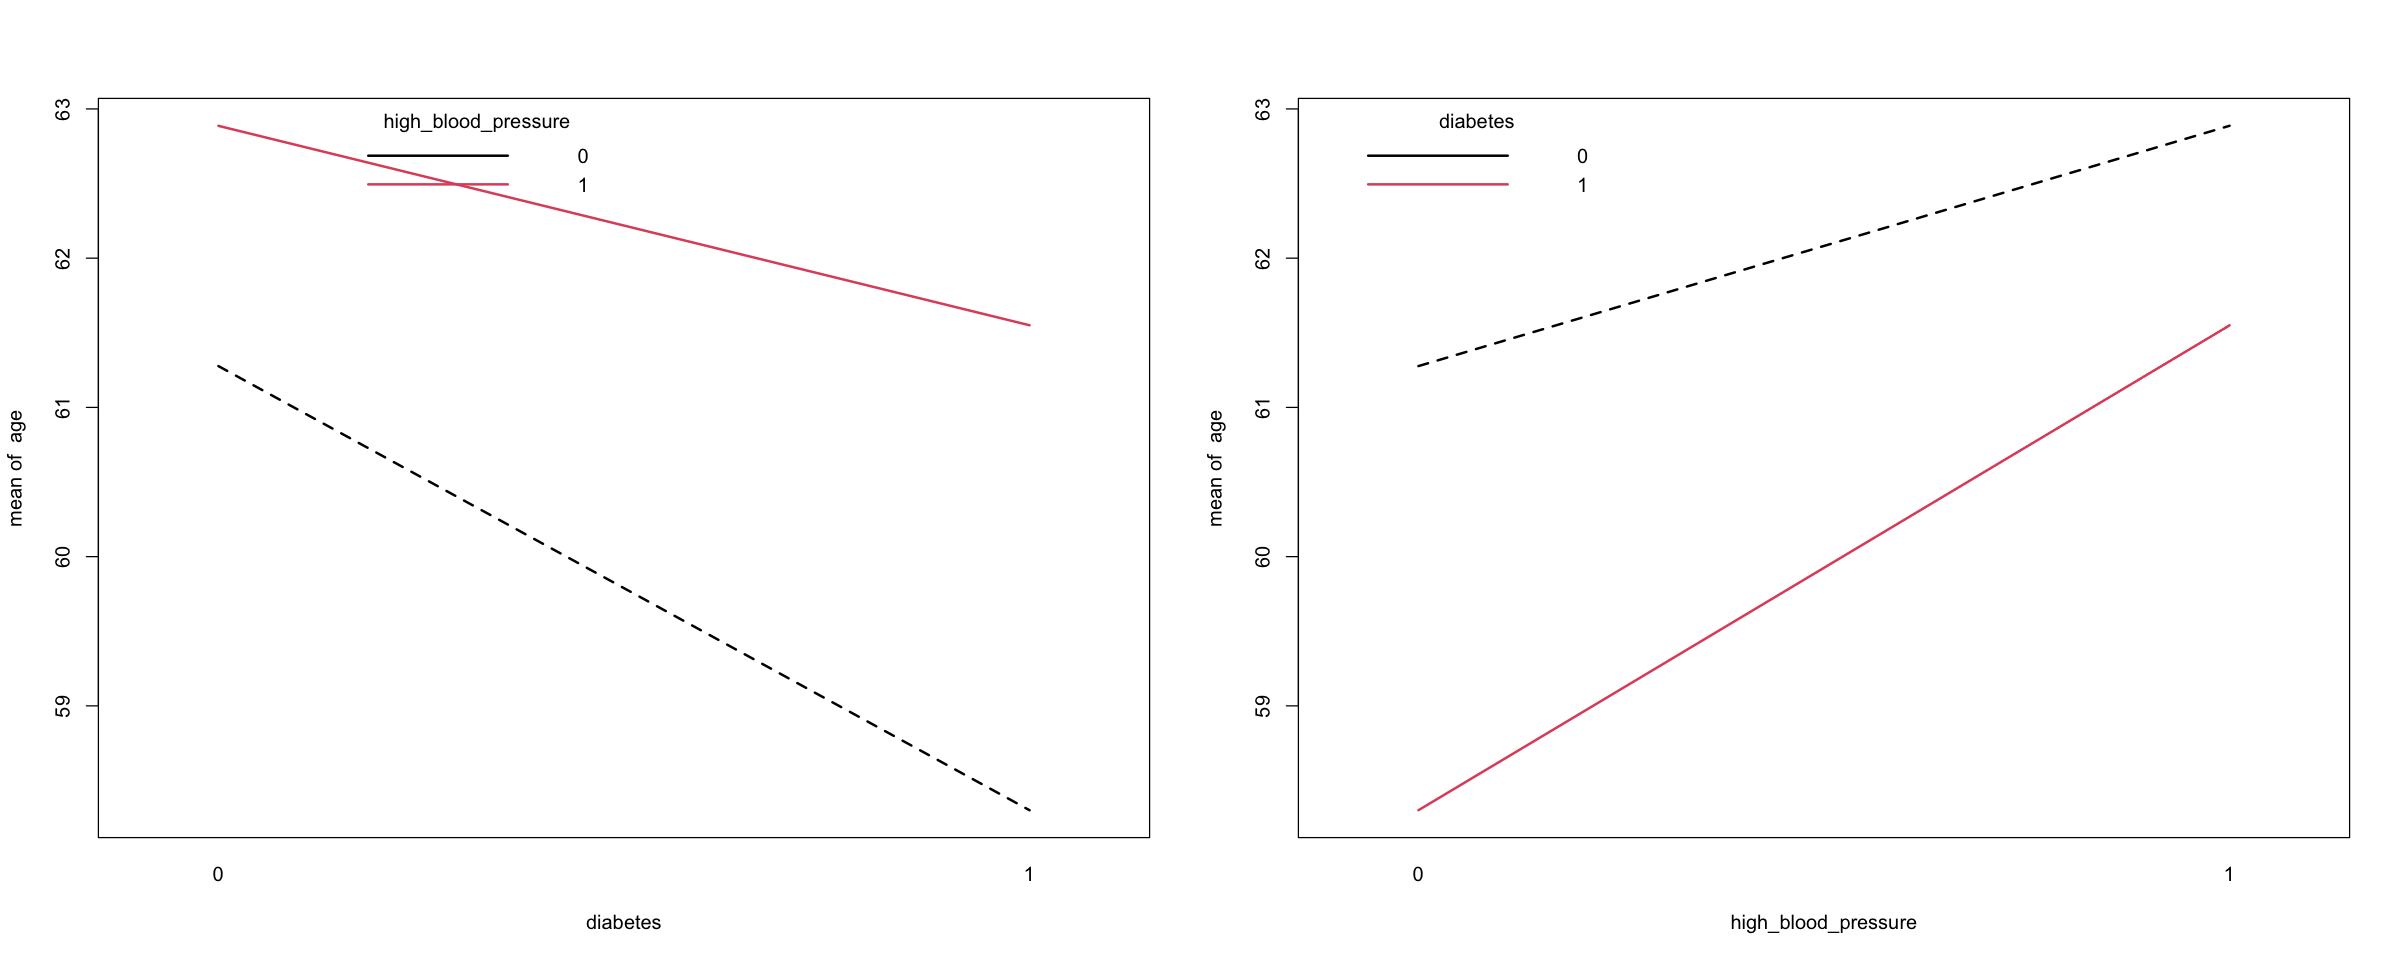

In [17]:
options(repr.plot.width = 20, repr.plot.height = 8)
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1, xpd = TRUE)

with(df, interaction.plot(diabetes, high_blood_pressure, age, lwd = 2, col = 1:2, legend = FALSE))
legend("topleft", legend = levels(df$high_blood_pressure), col = 1:2, lwd = 2, bty = "n", title = "high_blood_pressure")

with(df, interaction.plot(high_blood_pressure, diabetes, age, lwd = 2, col = 1:2, legend = FALSE))
legend("topleft", legend = levels(df$diabetes), col = 1:4, lwd = 2, bty = "n", title = "diabetes")


- Tương tác giữa tiểu đường và huyết áp cao: Có sự tương tác giữa tình trạng tiểu đường và huyết áp cao ảnh hưởng đến độ tuổi của bệnh nhân. Điều này có thể thấy qua sự thay đổi rõ rệt của độ tuổi trung bình khi thay đổi tình trạng tiểu đường và huyết áp cao.
- Ảnh hưởng riêng lẻ: Nhìn chung, sự khác biệt về tuổi giữa các nhóm tiểu đường và huyết áp cao không quá lớn, nhưng sự tương tác giữa hai yếu tố này có thể ảnh hưởng đến kết quả tổng thể.

# MÔ HÌNH

### MÔ HÌNH NHÂN

In [18]:
heart_int = aov(age~diabetes*high_blood_pressure, data = df)
heart_int

Call:
   aov(formula = age ~ diabetes * high_blood_pressure, data = df)

Terms:
                diabetes high_blood_pressure diabetes:high_blood_pressure
Sum of Squares    430.21              356.95                        44.41
Deg. of Freedom        1                   1                            1
                Residuals
Sum of Squares   41331.41
Deg. of Freedom       295

Residual standard error: 11.83666
Estimated effects may be unbalanced

In [19]:
summary(heart_int)

                              Df Sum Sq Mean Sq F value Pr(>F)  
diabetes                       1    430   430.2   3.071 0.0808 .
high_blood_pressure            1    357   356.9   2.548 0.1115  
diabetes:high_blood_pressure   1     44    44.4   0.317 0.5739  
Residuals                    295  41331   140.1                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- H0: Không có sự tương tác đáng kể giữa tiểu đường và huyết áp cao ảnh hưởng đến độ tuổi của bệnh nhân.
- H1:Có sự tương tác đáng kể giữa tiểu đường và huyết áp cao ảnh hưởng đến độ tuổi của bệnh nhân.

 Từ kết quả phân tích Anova cho mô hình nhân ta thấy:
 - Với mức ý nghĩa alpha = 0.05
 - Interaction (Tương tác giữa Diabetes và High Blood Pressure):
    - F-value: 0.317
    - Pr(>F): 0.5739 > alpha = 0.05
- Chưa đủ bằng chứng để Bác bỏ H0, hay có nghĩa là Sự tương tác giữa hai yếu tố này không có ảnh hưởng đáng kể đến độ tuổi của bệnh nhân, và mức độ ảnh hưởng này không có ý nghĩa thống kê.

- Chúng ta không thể sử dụng mô hình này

## MÔ HÌNH CỘNG

In [20]:
heart_add = aov(age~diabetes+high_blood_pressure, data = df)
heart_add  

Call:
   aov(formula = age ~ diabetes + high_blood_pressure, data = df)

Terms:
                diabetes high_blood_pressure Residuals
Sum of Squares    430.21              356.95  41375.82
Deg. of Freedom        1                   1       296

Residual standard error: 11.82299
Estimated effects may be unbalanced

In [21]:
summary(heart_add)

                     Df Sum Sq Mean Sq F value Pr(>F)  
diabetes              1    430   430.2   3.078 0.0804 .
high_blood_pressure   1    357   356.9   2.554 0.1111  
Residuals           296  41376   139.8                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Giả thuyết H0 cho diabetes (Tiểu đường): Không có sự khác biệt đáng kể về độ tuổi giữa các nhóm bệnh nhân có và không có tiểu đường.
    - Với mức ý nghĩa 0.05, chúng ta không đủ bằng chứng để bác bỏ giả thuyết H0. Điều này có nghĩa là không có sự khác biệt đáng kể về độ tuổi giữa các nhóm bệnh nhân có và không có tiểu đường. Tuy nhiên, vì P-value gần với mức ý nghĩa 0.1, có thể xem xét rằng tiểu đường có một ảnh hưởng nhất định đến độ tuổi, nhưng chưa đủ mạnh để đạt ý nghĩa thống kê.

- Giả thuyết H0 cho high_blood_pressure (Huyết áp cao): Không có sự khác biệt đáng kể về độ tuổi giữa các nhóm bệnh nhân có và không có huyết áp cao.
    -  Với mức ý nghĩa 0.05 và 0.1, chúng ta không đủ bằng chứng để bác bỏ giả thuyết H0. Điều này có nghĩa là không có sự khác biệt đáng kể về độ tuổi giữa các nhóm bệnh nhân có và không có huyết áp cao

## KIỂM TRA CÁC GIẢ ĐỊNH

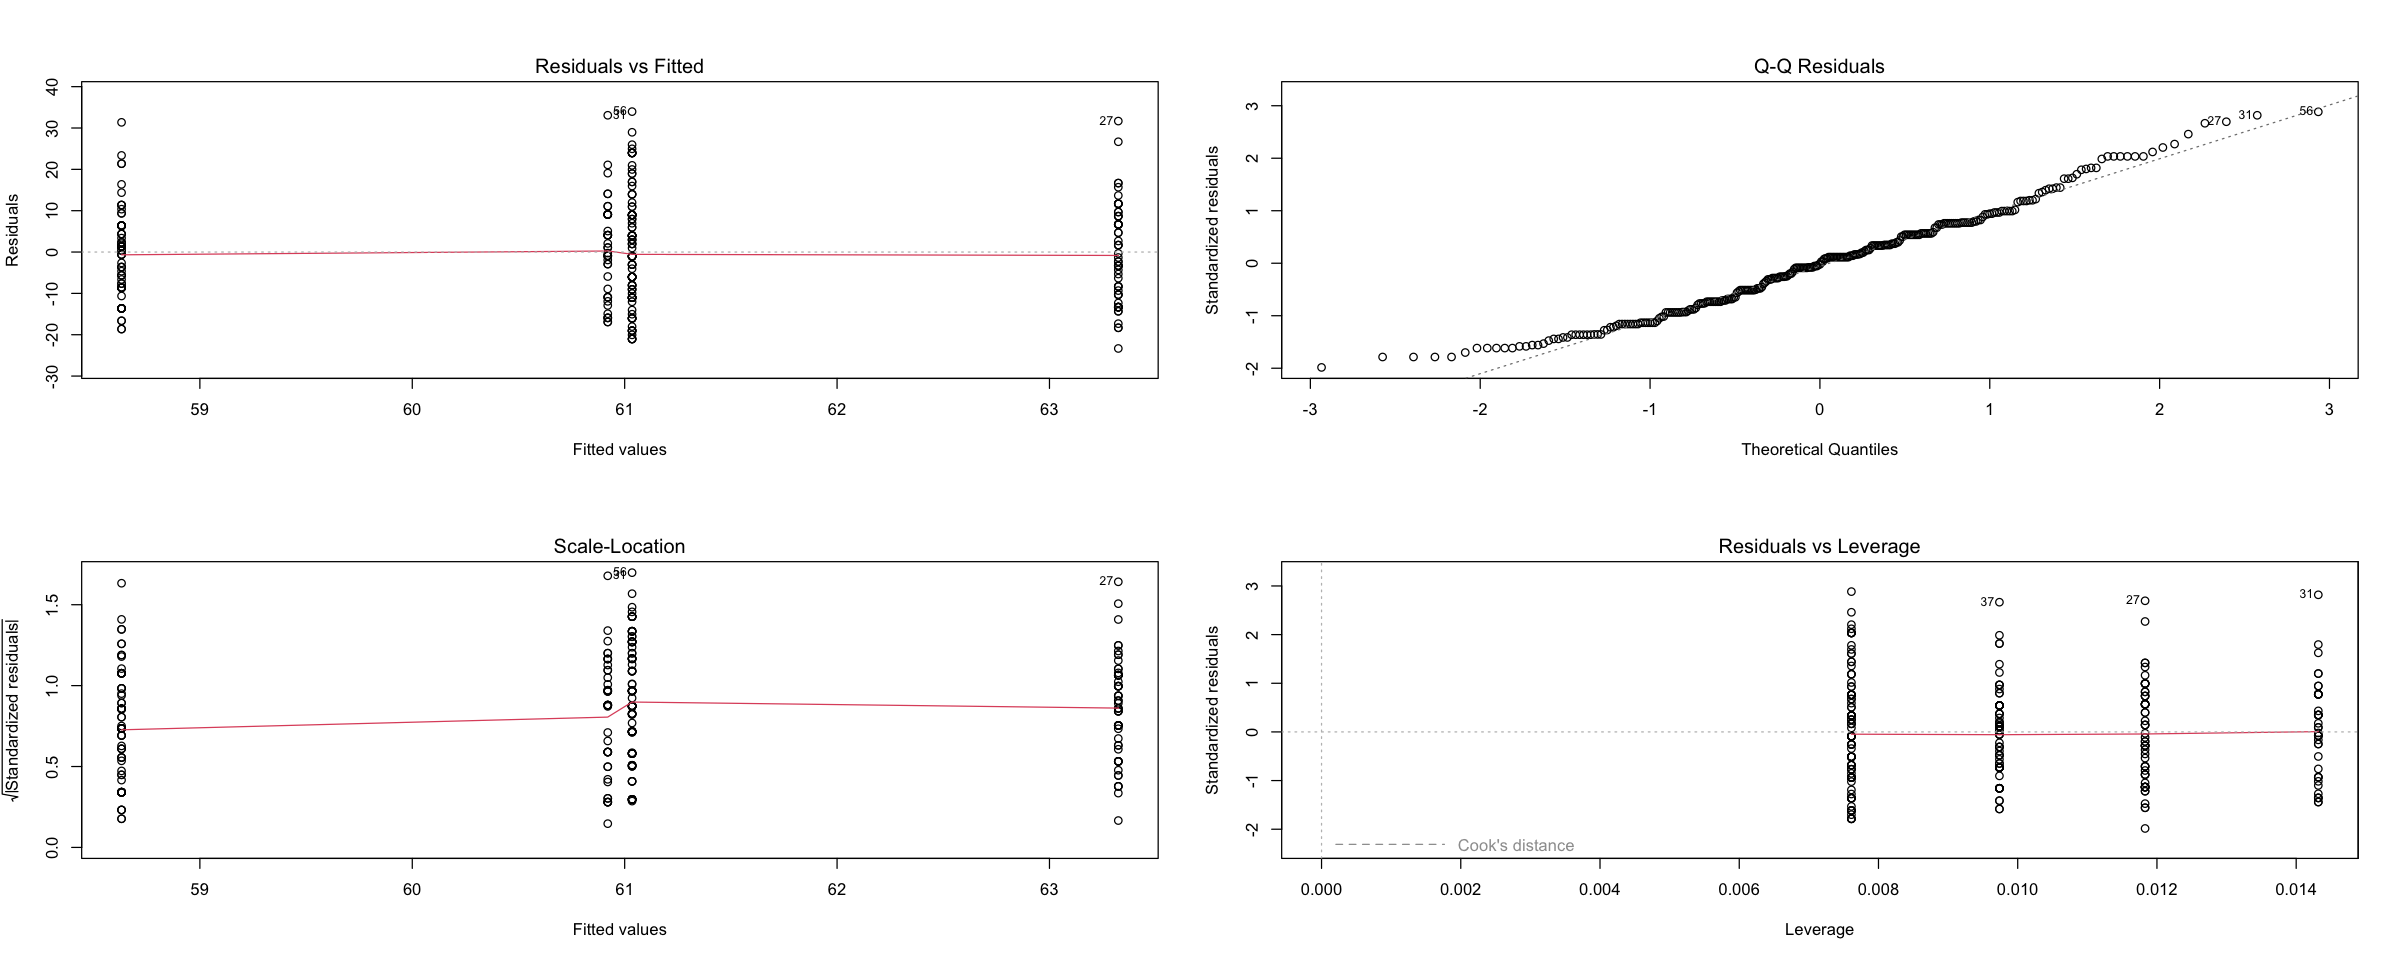

In [22]:
# Plot residuals
par(mfrow = c(2, 2))
plot(heart_add)

### KIỂM ĐỊNH PHƯƠNG SAI KHÔNG ĐỔI (Homoscedasticity)

- Giả thuyết gốc (H0): Phương sai của phần dư là không đổi (homoscedasticity).
- Giả thuyết đối (H1): Phương sai của phần dư thay đổi (heteroscedasticity)

In [23]:
bptest(heart_add)


	studentized Breusch-Pagan test

data:  heart_add
BP = 6.1184, df = 2, p-value = 0.04692


- Với mức ý nghĩa alpha = 0.05, P-value < 0.05: Điều này có nghĩa là chúng ta có đủ bằng chứng để bác bỏ giả thuyết H0.
- Phương sai của các phần dư không đồng nhất


### KIỂM ĐỊNHH PHÂN PHỐI CHUẨN CỦA PHẦN DƯ ((Normality of Residuals))

- Giả thuyết gốc (H0): Phần dư có phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không có phân phối chuẩn.

In [24]:
# Thực hiện kiểm định Shapiro-Wilk
shapiro.test(residuals(heart_add))


	Shapiro-Wilk normality test

data:  residuals(heart_add)
W = 0.98019, p-value = 0.000373


- Với mức ý nghĩa alpha = 0.05, P-value < 0.05: Điều này có nghĩa là chúng ta có đủ bằng chứng để bác bỏ giả thuyết H0.
- Phần dư của mô hình không tuân theo phân phối chuẩn

### KIỂM ĐỊNH TỰ TƯƠNG QUAN (AUTOCORRELATION)

- Giả thuyết gốc (H0): Không có tự tương quan (rho = 0).
- Giả thuyết đối (H1): Có tự tương quan (rho ≠ 0).

In [25]:
# Thực hiện kiểm định Durbin-Watson
durbinWatsonTest(heart_add)

 lag Autocorrelation D-W Statistic p-value
   1      0.02680811      1.940146    0.64
 Alternative hypothesis: rho != 0

- P-value = 0.64: Với mức ý nghĩa alpha = 0.05, p-value lớn hơn 0.05 cho thấy rằng chúng ta không có đủ bằng chứng để bác bỏ giả thuyết H0.
- Không có tự tương quan trong phần dư của mô hình, do đó giả định về độc lập của các sai số trong hồi quy tuyến tính được thỏa mãn. 

## KẾT LUẬN
Mô hình hồi quy hiện tại không thỏa mãn hai yếu tố quan trọng: phương sai phần dư không đồng nhất và phân phối phần dư không chuẩn. Do đó, cần cân nhắc áp dụng biến đổi Box-Cox hoặc sử dụng một mô hình hồi quy khác phù hợp hơn.

### BIẾN ĐỔI TRANSFORMATION (PP BOX-COX) VÀ XÂY DỰNG LẠI MÔ HÌNH

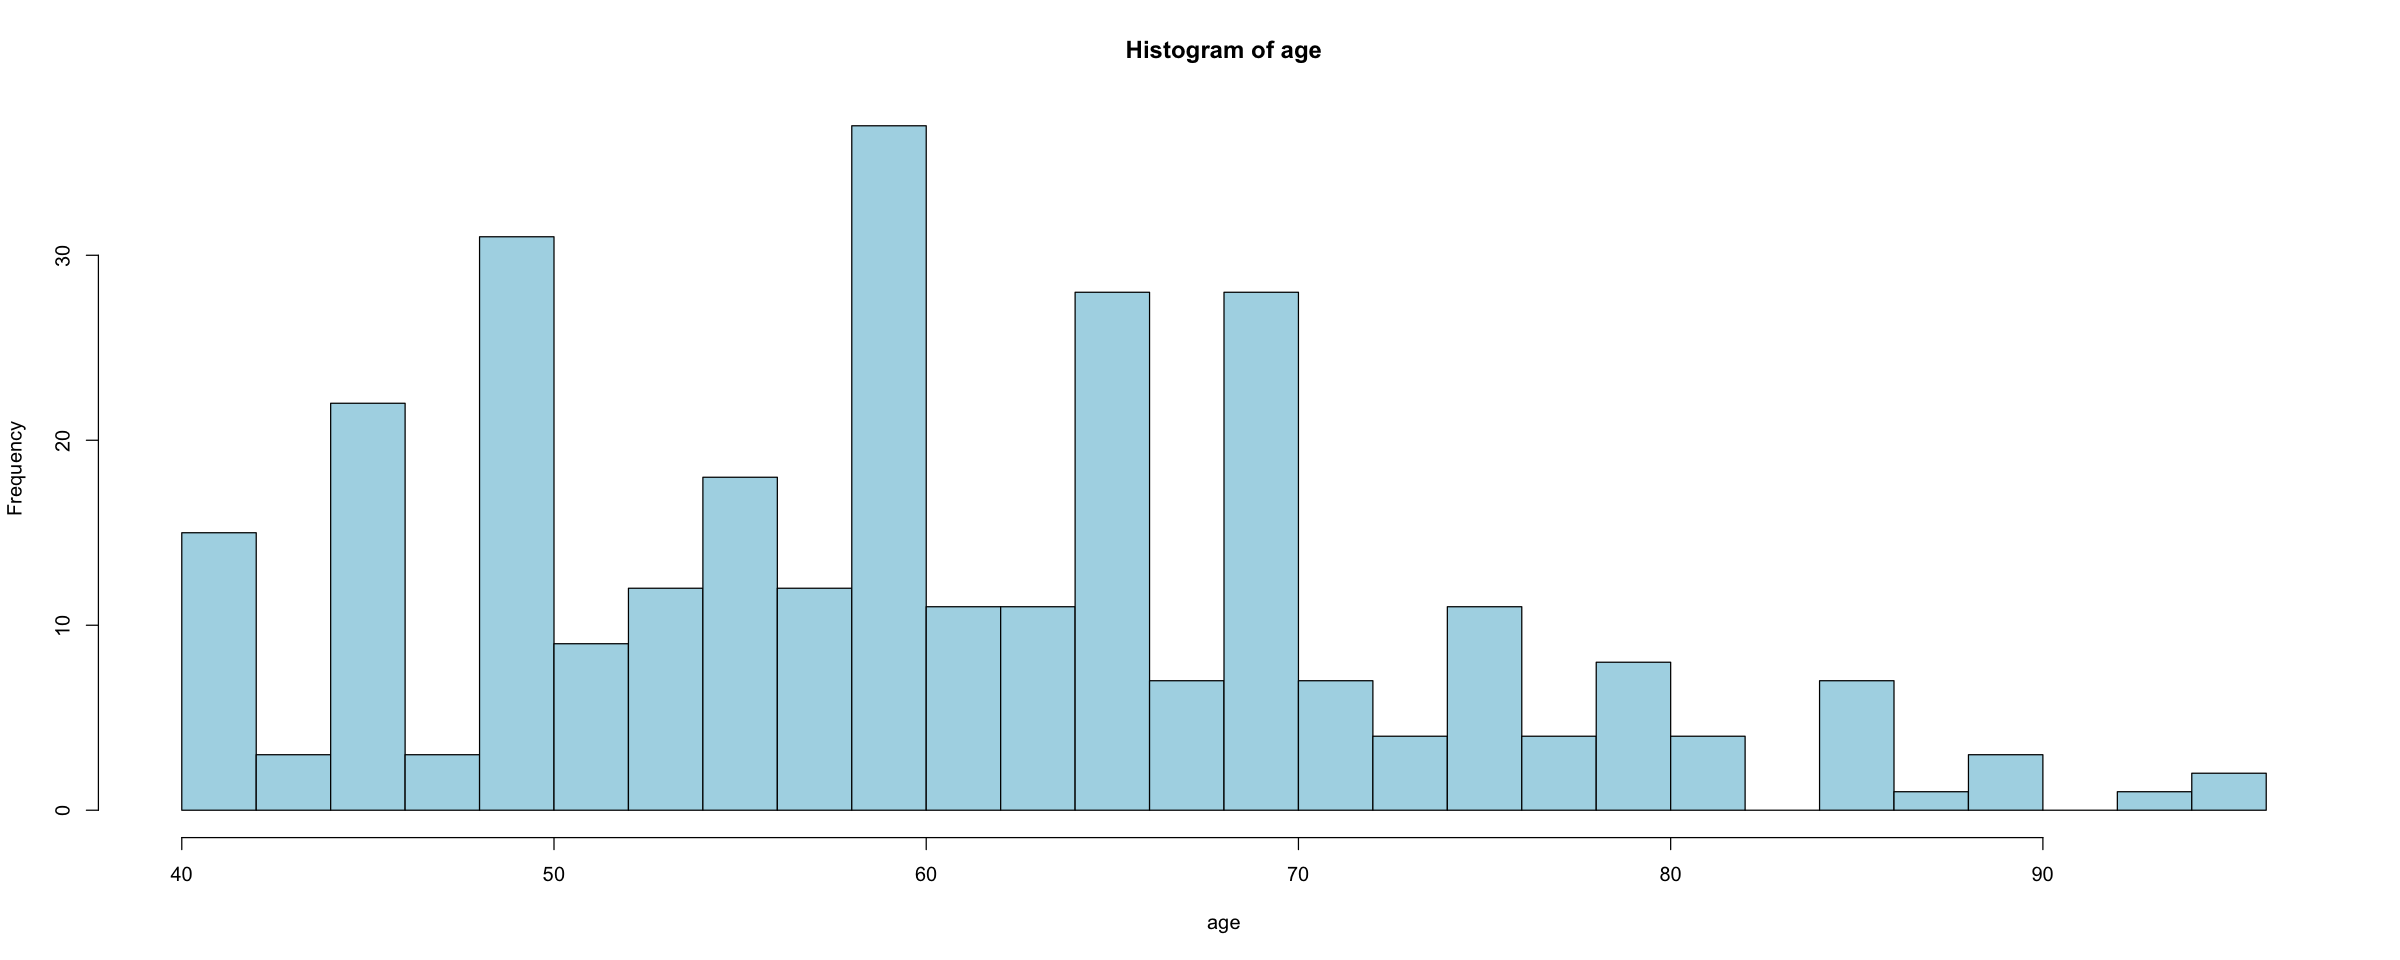

In [26]:
# Vẽ biểu đồ histogram cho cột 'age'
hist(df$age, 
     breaks = 30, 
     main = "Histogram of age", 
     xlab = "age", 
     ylab = "Frequency", 
     col = "lightblue", 
     border = "black")

[1] "Best lambda: 0.0202020202020203"


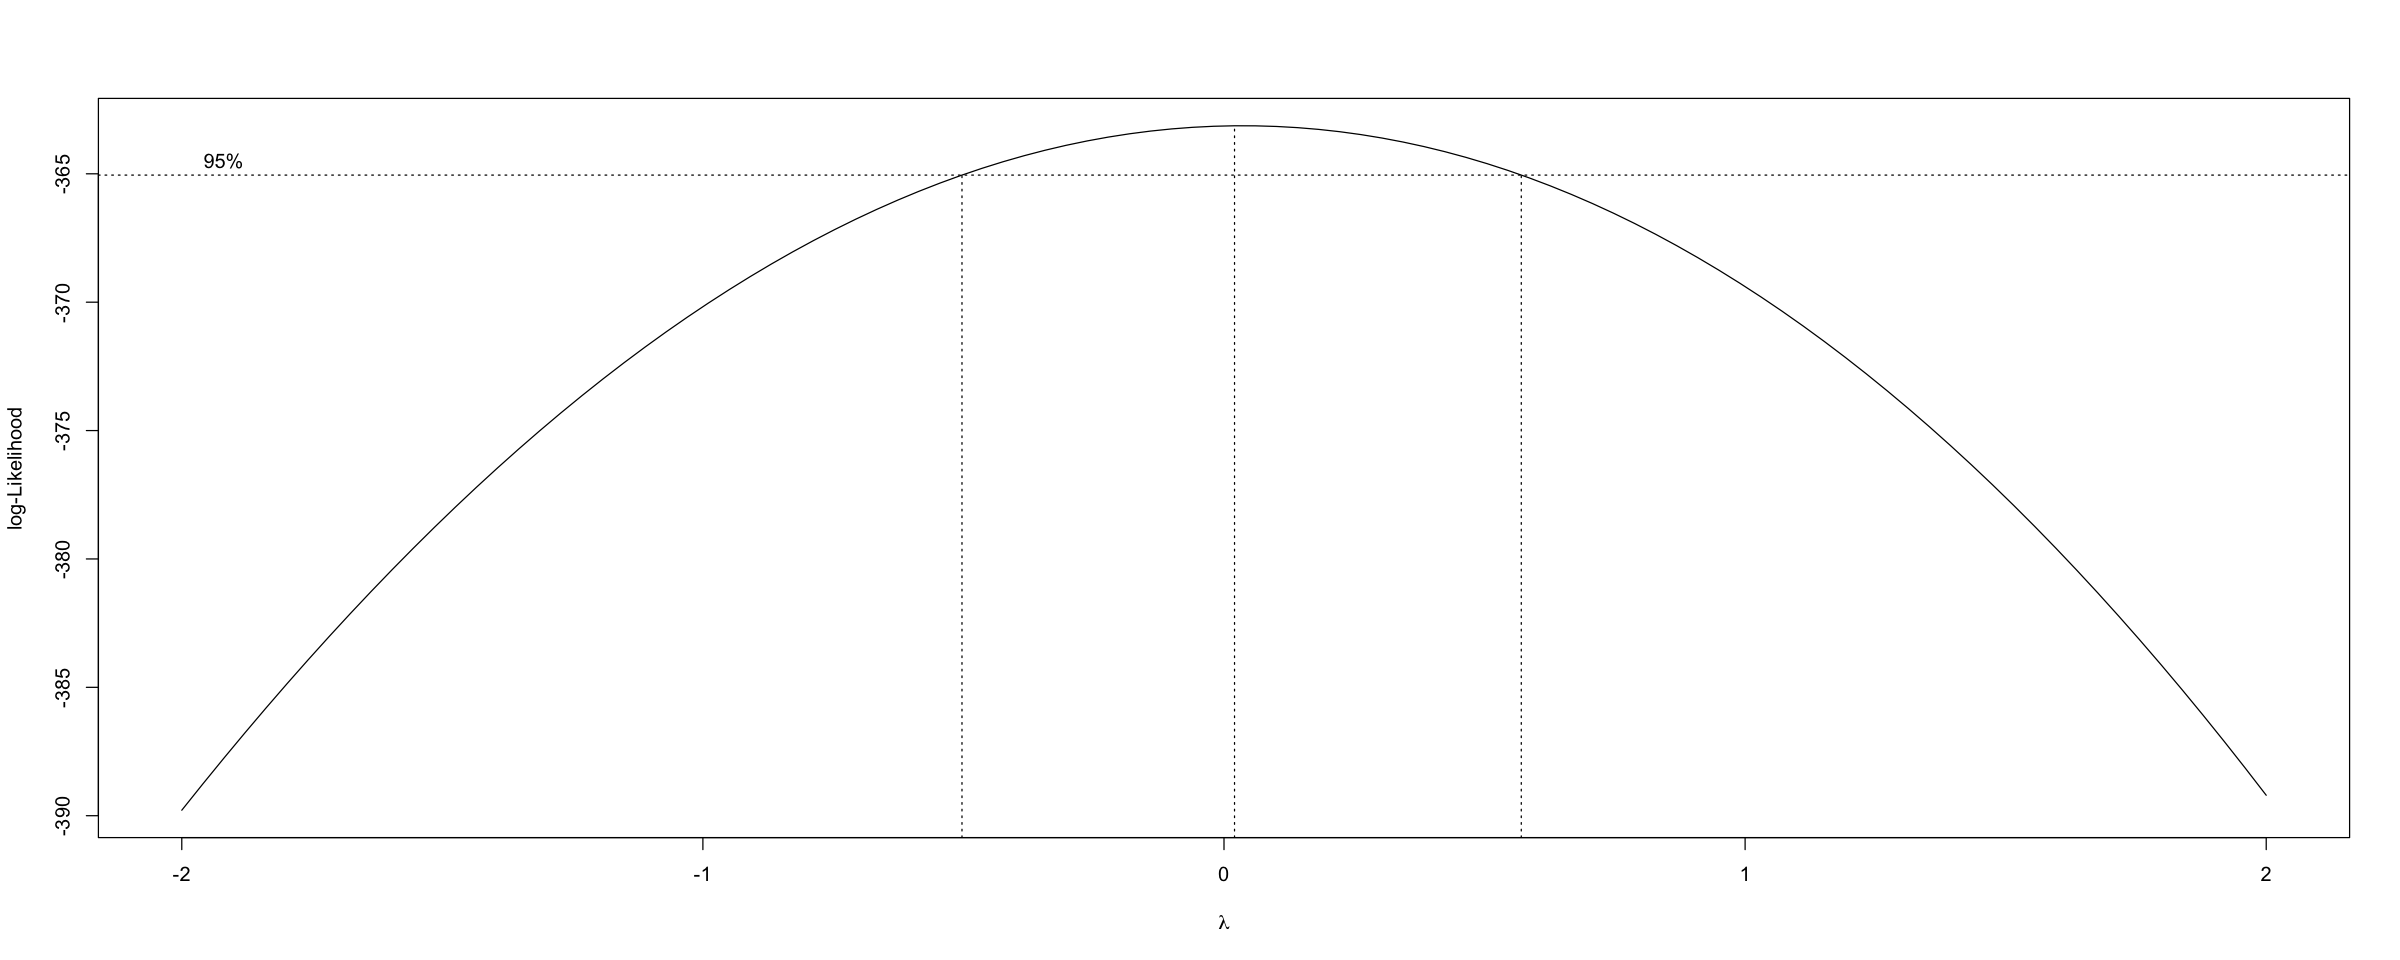

In [27]:
# Tính toán giá trị lambda tốt nhất cho biến đổi Box-Cox
box_cox_trans <- boxcox(age ~ 1, data = df, plotit = TRUE)

# Lấy giá trị lambda tốt nhất
lambda <- box_cox_trans$x[which.max(box_cox_trans$y)]
print(paste("Best lambda:", lambda))

# Áp dụng biến đổi Box-Cox
df$boxcox_age <- ifelse(lambda == 0, log(df$age), (df$age^lambda - 1) / lambda)

In [28]:
# Tạo một dataframe mới, chứa 3 cột "boxcox_age", "diabetes", "high_blood_pressure" để tiến hành phân tích tiếp
df_boxcox = df[, c("boxcox_age", "diabetes", "high_blood_pressure")]
str(df_boxcox)

'data.frame':	299 obs. of  3 variables:
 $ boxcox_age         : num  4.51 4.51 4.51 4.51 4.51 ...
 $ diabetes           : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 2 1 1 ...
 $ high_blood_pressure: Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 1 1 2 ...


### MÔ HÌNH NHÂN (SAU BIẾN ĐỔI BOX-COX)

In [29]:
boxcox_int = aov(boxcox_age~diabetes*high_blood_pressure, data = df_boxcox)
summary(boxcox_int)

                              Df    Sum Sq   Mean Sq F value Pr(>F)
diabetes                       1 5.000e-28 5.014e-28   0.720  0.397
high_blood_pressure            1 1.270e-27 1.269e-27   1.824  0.178
diabetes:high_blood_pressure   1 9.000e-28 8.973e-28   1.289  0.257
Residuals                    295 2.053e-25 6.961e-28               

- Giả thuyết H0 cho tương tác giữa diabetes và high_blood_pressure:
    - H0 : Không có sự tương tác đáng kể giữa tiểu đường và huyết áp cao ảnh hưởng đến biến phụ thuộc.
    -  F-value = 1.289, p-value = 0.257
    - P-value > alpha = 0.05, không đủ bằng chứng để bác bỏ giả thuyết H0, nghĩa là không có sự tương tác đáng kể giữa tiểu đường và huyết áp cao ảnh hưởng đến biến phụ thuộc.

- Không thể sử dụng mô hình nhân này

### MÔ HÌNH CỘNG (SAU KHI BIẾN ĐỔI BOX-COX)

In [30]:
boxcox_int = aov(boxcox_age~diabetes+high_blood_pressure, data = df_boxcox)
summary(boxcox_int)

                     Df    Sum Sq   Mean Sq F value Pr(>F)
diabetes              1 5.000e-28 5.014e-28   0.720  0.397
high_blood_pressure   1 1.270e-27 1.269e-27   1.822  0.178
Residuals           296 2.062e-25 6.967e-28               

- Giả thuyết H0 cho biến Diabetes:
- H0: Không có sự khác biệt đáng kể về biến phụ thuộc giữa các nhóm có và không có tiểu đường.
- P-value > 0.05, không đủ bằng chứng để bác bỏ giả thuyết H0. Điều này nghĩa là tiểu đường không có tác động đáng kể đến biến phụ thuộc age.

- Giả thuyết H0 cho biến High_blood_pressure: Không có sự khác biệt đáng kể về biến phụ thuộc giữa các nhóm có và không có huyết áp cao.
- P-value > 0.05, không đủ bằng chứng để bác bỏ giả thuyết H0. Điều này nghĩa là huyết áp cao không có tác động đáng kể đến biến phụ thuộc.

## KIỂM TRA CÁC GIẢ ĐỊNH - CỦA MÔ HÌNH SAU KHI BIẾN ĐỔI BOX-COX

### KIỂM ĐỊNH PHƯƠNG SAI KHÔNG ĐỔI (Homoscedasticity)

- Giả thuyết gốc (H0): Phương sai của phần dư là không đổi (homoscedasticity).
- Giả thuyết đối (H1): Phương sai của phần dư thay đổi (heteroscedasticity)

In [31]:
bptest(boxcox_int)


	studentized Breusch-Pagan test

data:  boxcox_int
BP = 2.5895, df = 2, p-value = 0.274


- P-value = 0.274: Với mức ý nghĩa alpha = 0.05, p-value lớn hơn 0.05, cho thấy chúng ta không có đủ bằng chứng để bác bỏ giả thuyết H0.

- Kết luận: Phương sai của phần dư là đồng nhất, tức là không có hiện tượng heteroscedasticity trong mô hình. Điều này chỉ ra rằng phương sai phần dư không thay đổi theo giá trị của các biến độc lập, và do đó mô hình không vi phạm giả định về phương sai phần dư đồng nhất.

### KIỂM ĐỊNHH PHÂN PHỐI CHUẨN CỦA PHẦN DƯ ((Normality of Residuals))

- Giả thuyết gốc (H0): Phần dư có phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không có phân phối chuẩn.

In [32]:
# Thực hiện kiểm định Shapiro-Wilk
shapiro.test(residuals(boxcox_int))


	Shapiro-Wilk normality test

data:  residuals(boxcox_int)
W = 0.068691, p-value < 2.2e-16


P-value < 0.05: Với mức ý nghĩa alpha = 0.05, p-value nhỏ hơn 0.05, điều này có nghĩa là chúng ta có đủ bằng chứng để bác bỏ giả thuyết H0.

Kết luận: Phần dư của mô hình không tuân theo phân phối chuẩn. 

Mặc dù đã thực hiện biến đổi Box-Cox, giả định quan trọng của mô hình về phân phối chuẩn của phần dư, vẫn chưa được thỏa mãn. Do đó, chúng ta sẽ tiến hành kiểm định Kruskal-Wallis để phân tích sự khác biệt giữa các nhóm mà không cần giả định phân phối chuẩn của dữ liệu.

### KIỂM ĐỊNH KRUSKAL-WALLIS

In [33]:
df <- df[ , !names(df) %in% c("boxcox_age")]

- Giả thuyết H0: Không có sự khác biệt đáng kể về phân phối của biến age giữa các nhóm diabetes (có hoặc không có tiểu đường).

In [34]:
# Kiểm định Kruskal-Wallis cho age theo diabetes
kruskal_test_diabetes <- kruskal.test(age ~ diabetes, data = df)
print(kruskal_test_diabetes)


	Kruskal-Wallis rank sum test

data:  age by diabetes
Kruskal-Wallis chi-squared = 2.3954, df = 1, p-value = 0.1217



- P-value = 0.1217: Với mức ý nghĩa alpha = 0.05, p-value lớn hơn 0.05, cho thấy chúng ta không có đủ bằng chứng để bác bỏ giả thuyết H0.
- Kết luận: Không có sự khác biệt đáng kể về tuổi giữa các nhóm có và không có tiểu đường theo kết quả của kiểm định Kruskal-Wallis. Điều này chỉ ra rằng tuổi của bệnh nhân không có sự khác biệt có ý nghĩa thống kê giữa nhóm có tiểu đường và nhóm không có tiểu đường đối với bộ dữ liệu này

In [35]:
# Kiểm định Kruskal-Wallis cho age theo diabetes
kruskal_test_blood <- kruskal.test(age ~ high_blood_pressure, data = df)
print(kruskal_test_blood)


	Kruskal-Wallis rank sum test

data:  age by high_blood_pressure
Kruskal-Wallis chi-squared = 3.3319, df = 1, p-value = 0.06795



- P-value = 0.06795: Với mức ý nghĩa alpha =0.05, p-value lớn hơn 0.05 nhưng nhỏ hơn 0.1, điều này có nghĩa là chúng ta không đủ bằng chứng để bác bỏ giả thuyết H0 ở mức ý nghĩa 0.05, nhưng có thể xem xét rằng có một số mức độ khác biệt giữa các nhóm ở mức ý nghĩa 0.1.
- Kết luận: Không có sự khác biệt đáng kể về phân phối tuổi giữa các nhóm có và không có huyết áp cao ở mức ý nghĩa 0.05. Tuy nhiên, với mức ý nghĩa 0.1, có thể có một sự khác biệt nhỏ, nhưng chưa đủ mạnh để đạt được sự khác biệt có ý nghĩa thống kê.

## KẾT LUẬN
- Kruskal-Wallis: Kết quả kiểm định phi tham số này chỉ ra rằng không có sự khác biệt có ý nghĩa thống kê về phân phối tuổi giữa các nhóm bệnh nhân có và không có tiểu đường, cũng như giữa các nhóm bệnh nhân có và không có huyết áp cao trong bộ dữi liệu này

## ĐỀ XUẤT CẢI TIẾN:
- Tăng kích thước mẫu: giúp tăng độ tin cậy của các kiểm định thống kê và phát hiện ra những khác biệt mà mẫu nhỏ không thể hiện rõ
- Phân tích phân tầng (Stratified Analysis): có thể phân tích dữ liệu theo các tầng khác nhau dựa trên các biến khác như giới tính, hoặc các bệnh lý đi kèm để xem xét liệu các yếu tố này có tương tác với tình trạng tiểu đường và huyết áp cao hay không.
